# Exploratory Data Analysis & Intro
## Goal
1. Investigate top-paying roles and skills in the data science industry.
2. Use Python to explore a real-live dataset on job postings.
3. For job-seekers: use these insights to help find the best job opportunities.
## Questions to Answer
1. What are the most demanded skills for the top 3 most popular data roles?
2. How are in-demand skills trending for Data Analysts?
3. How well do jobs and skills pay for Data Analysts?
4. What is the most optimal skill to learn for Data Analysts? (High Demand AND High Paying)
I'll be focusing on US Data Analyst roles.
# Exploratory Data Analysis for all Data Roles
## Roles to Explore

In [ ]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import ast
import matplotlib.ticker as ticker
import seaborn as sns

df = pd.read_csv("C:\\Users\\pc\\OneDrive\\Desktop\\Python_Data_Analytics_Course\\CSVs\\data_jobs.csv")
# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skills: ast.literal_eval(skills) if isinstance(skills, str) else skills)

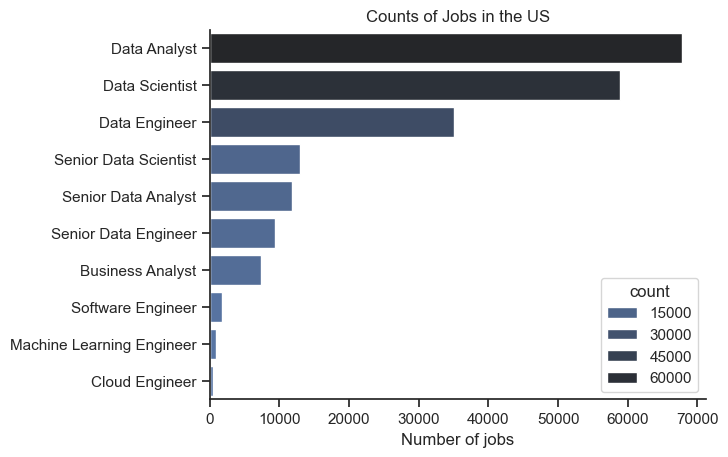

In [35]:
df_US = df[df['job_country'] == 'United States']
df_US_plot = df_US['job_title_short'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_US_plot ,x='count' , y='job_title_short' , hue='count', palette='dark:b_r')
sns.despine()
plt.xlabel('Number of jobs')
plt.ylabel('')
plt.title('Counts of Jobs in the US')
plt.show()

## Job location to Explore

In [29]:
df_DA_US = df.copy()

df_DA_US = df_DA_US[(df_DA_US['job_country'] == 'United States') & (df_DA_US['job_title_short'] == 'Data Analyst')]


In [30]:
df_plot = (df_DA_US['job_location']
           .value_counts()
           .head(10)
           .to_frame()
           )

df_plot

,count
job_location,
Anywhere,5106
"New York, NY",3035
"Atlanta, GA",2741
"Chicago, IL",2337
"Austin, TX",1919
"Dallas, TX",1862
"Washington, DC",1592
"Charlotte, NC",1433
"Tampa, FL",1431


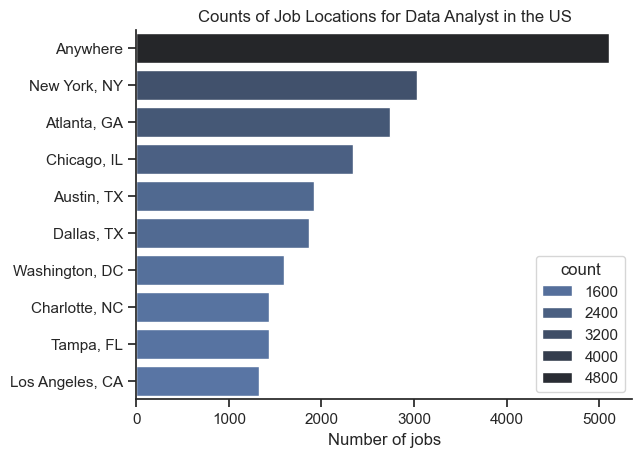

In [31]:
sns.set_theme(style='ticks')
sns.barplot(data=df_plot ,x='count' , y='job_location' , hue='count', palette='dark:b_r')
sns.despine()
plt.xlabel('Number of jobs')
plt.ylabel('')
plt.title('Counts of Job Locations for Data Analyst in the US')
plt.show()

## Job Opportunities

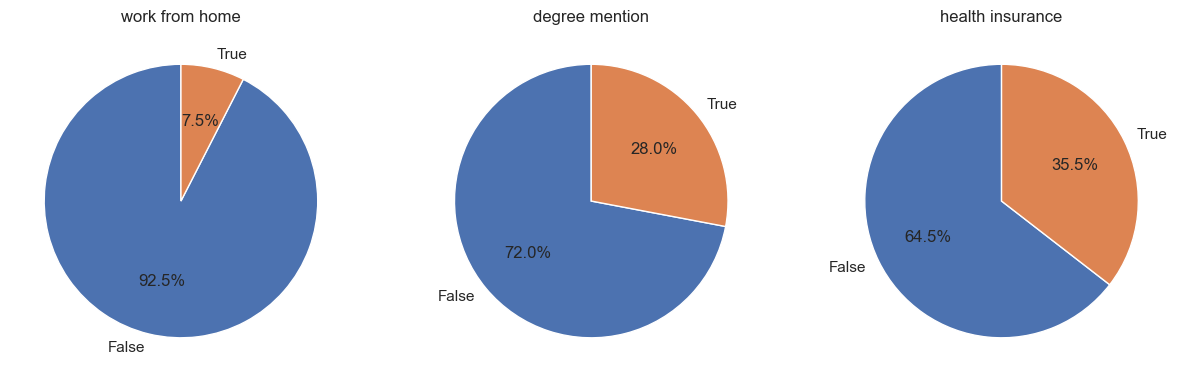

In [32]:
df_pie_dic = {
    'job_work_from_home': 'work from home',
    'job_no_degree_mention': 'degree mention',
    'job_health_insurance' : 'health insurance'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((15,5))

for idx, (col, title) in enumerate(df_pie_dic.items()):
    values = df_DA_US[col].value_counts()
    ax[idx].pie(values, labels=values.index, autopct='%1.1f%%',startangle=90)
    ax[idx].set_title(title)
    


## Companies to Explore

In [33]:
df_plot_C = (df_DA_US['company_name']
           .value_counts()
           .head(10)
           .to_frame()
           )

df_plot_C

,count
company_name,
Robert Half,959
Insight Global,827
Dice,584
UnitedHealth Group,507
Get It Recruit - Information Technology,503
Citi,477
Corporate,416
SynergisticIT,374
Centene Corporation,350


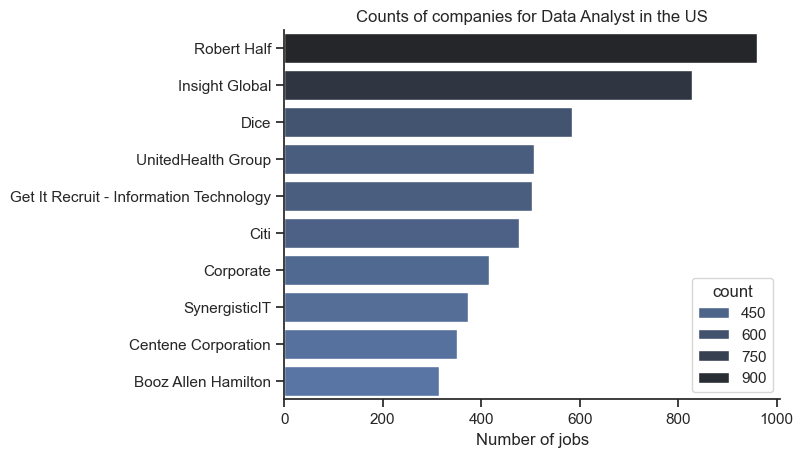

In [34]:
sns.set_theme(style='ticks')
sns.barplot(data=df_plot_C ,x='count' , y='company_name' , hue='count', palette='dark:b_r')
sns.despine()
plt.xlabel('Number of jobs')
plt.ylabel('')
plt.title('Counts of companies for Data Analyst in the US')
plt.show()